#### import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

# Full path to your CSV
file_path = '/Users/asliozdemirstrollo/Documents/Documents/Time Series/Clean Skies London/air-quality-london-monthly-averages.csv'

# Create a Pandas DataFrame from the CSV data
df = pd.read_csv(file_path)


In [2]:
df['Month']

0      Jan-08
1      Feb-08
2      Mar-08
3      Apr-08
4      May-08
        ...  
134    Mar-19
135    Apr-19
136    May-19
137    Jun-19
138    Aug-19
Name: Month, Length: 139, dtype: object

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, AutoRegResultsWrapper
from typing import Any
from matplotlib.figure import Figure
from matplotlib.axes._axes import Axes

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

df['Month'] = df['Month'].dt.to_period('M')
df = df.set_index('Month')
df = df.sort_index()

In [5]:
df


,London Mean Roadside:Nitric Oxide (ug/m3),London Mean Roadside:Nitrogen Dioxide (ug/m3),London Mean Roadside:Oxides of Nitrogen (ug/m3),London Mean Roadside:Ozone (ug/m3),London Mean Roadside:PM10 Particulate (ug/m3),London Mean Roadside:PM2.5 Particulate (ug/m3),London Mean Roadside:Sulphur Dioxide (ug/m3),London Mean Background:Nitric Oxide (ug/m3),London Mean Background:Nitrogen Dioxide (ug/m3),London Mean Background:Oxides of Nitrogen (ug/m3),London Mean Background:Ozone (ug/m3),London Mean Background:PM10 Particulate (ug/m3),London Mean Background:PM2.5 Particulate (ug/m3),London Mean Background:Sulphur Dioxide (ug/m3)
Month,,,,,,,,,,,,,,
2008-01,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
2008-02,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
2008-03,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
2008-04,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
2008-05,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03,31.0,42.6,90.0,34.9,20.9,11.3,4.9,7.7,25.7,36.0,52.7,16.6,10.9,2.3
2019-04,25.2,46.2,84.9,38.1,32.3,22.8,12.4,6.9,31.5,39.9,54.7,29.2,23.1,2.8
2019-05,24.7,39.7,77.5,35.7,19.5,10.7,11.5,5.5,22.4,29.3,53.7,15.3,10.9,1.5


In [6]:

# keep this column
df = df[['London Mean Roadside:Nitrogen Dioxide (ug/m3)']].rename(
    columns={'London Mean Roadside:Nitrogen Dioxide (ug/m3)': 'NO2_ug_m3'}
)

In [7]:
# Perform the ADF test on the 'Adj Close' column
result: Any = adfuller(df["NO2_ug_m3"])

# Print the ADF statistic and the p-value
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])

# Print the critical values for different confidence levels
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

ADF Statistic: 0.017365
p-value: 0.959945
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


In [8]:
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary and requires differencing.")

The time series is non-stationary and requires differencing.


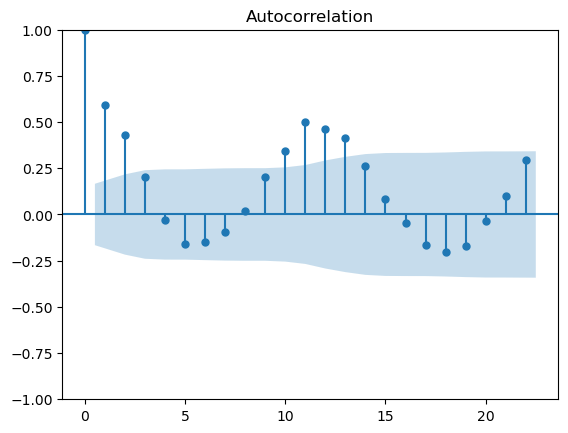

In [9]:
plot_acf(df['NO2_ug_m3']);

In [10]:
df = df.copy()
df['NO2_ug_m3_diff'] = df['NO2_ug_m3'].diff()
df = df.dropna()

<Axes: title={'center': 'Original vs Differenced NO₂'}, xlabel='Month'>

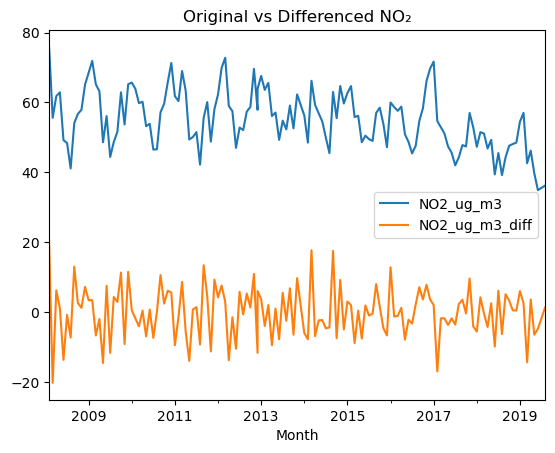

In [11]:
diff_df = df.copy()

df.plot(title='Original vs Differenced NO₂')

In [12]:
df

,NO2_ug_m3,NO2_ug_m3_diff
Month,,
2008-02,75.9,20.4
2008-03,55.6,-20.3
2008-04,61.8,6.2
2008-05,62.9,1.1
2008-06,49.2,-13.7
...,...,...
2019-03,42.6,-14.4
2019-04,46.2,3.6
2019-05,39.7,-6.5


In [13]:
# Perform the ADF test on the differenced data
result = adfuller(df['NO2_ug_m3_diff'])

# Print the ADF statistic and the p-value after differencing
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])

# Print the critical values after differencing
print('Critical Values after differencing:')
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

ADF Statistic after differencing: -9.347371
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.483
	5%: -2.884
	10%: -2.579


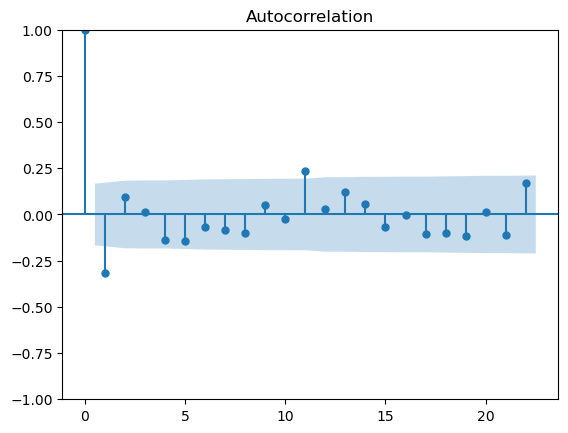

In [14]:
plot_acf(df['NO2_ug_m3_diff']);

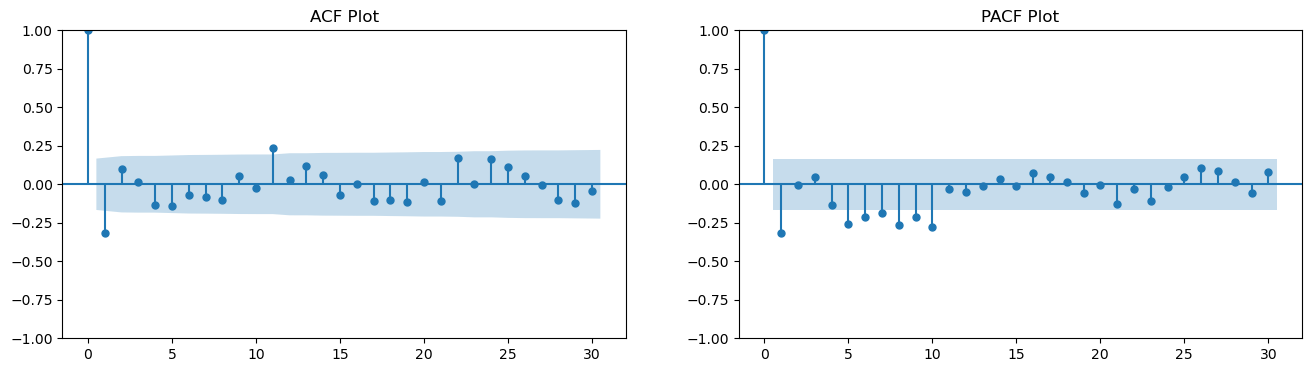

In [15]:
diff_df: pd.DataFrame
fig: Figure
axes: list[Axes]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(diff_df["NO2_ug_m3_diff"],
         lags=30,
         ax=axes[0])

plot_pacf(diff_df["NO2_ug_m3_diff"],
          lags=30,
          ax=axes[1])

axes[0].set_title("ACF Plot")
axes[1].set_title("PACF Plot")

plt.show()

In [16]:
diff_df.index = diff_df.index.to_timestamp()

In [17]:
# Split the Data:

# Extract the column as a separate Series
diff_df = df.copy()                         
train = diff_df[:int(len(diff_df)*0.9)]
test  = diff_df[int(len(diff_df)*0.9):]

print("Train length:", len(train))
print("Test length:", len(test))

Train length: 124
Test length: 14


In [18]:
# Autoregressive (AR) Model 

In [19]:
p: int = 0
ar_model: AutoRegResultsWrapper = AutoReg(train["NO2_ug_m3_diff"], lags=p).fit()

In [20]:
# 5️⃣ Now you can safely set the frequency
diff_freq_df = diff_df.asfreq("M")  # or "B", "D", etc.

In [21]:
diff_freq_df


,NO2_ug_m3,NO2_ug_m3_diff
Month,,
2008-02,75.9,20.4
2008-03,55.6,-20.3
2008-04,61.8,6.2
2008-05,62.9,1.1
2008-06,49.2,-13.7
...,...,...
2019-03,42.6,-14.4
2019-04,46.2,3.6
2019-05,39.7,-6.5


In [22]:
diff_freq_df.isnull().sum()

NO2_ug_m3         0
NO2_ug_m3_diff    0
dtype: int64

In [23]:
# .ffill() or .bfill()

In [24]:
# Forward fill
# df: pd.DataFrame
# df_filled: pd.DataFrame = df.ffill()

# Or backward fill
# df_filled: pd.DataFrame = df.bfill()

In [25]:
diff_freq_df = diff_freq_df.ffill()

In [26]:
diff_freq_df.isnull().sum()

NO2_ug_m3         0
NO2_ug_m3_diff    0
dtype: int64

In [27]:
diff_df.isnull().sum()

NO2_ug_m3         0
NO2_ug_m3_diff    0
dtype: int64

In [28]:
# .interpolate()

# diff_freq_df: pd.DataFrame = diff_freq_df.interpolate(method="time")

<Axes: title={'center': 'NO₂ after fill'}, xlabel='Month'>

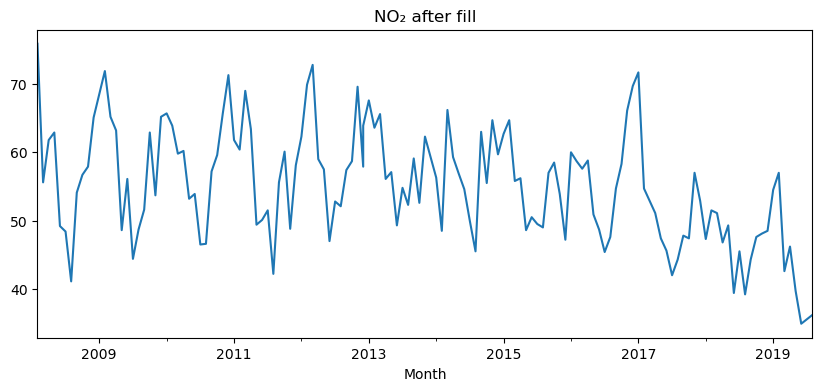

In [29]:
diff_freq_df["NO2_ug_m3"].plot(figsize=(10,4), title="NO₂ after fill")

In [30]:
# train test split again

In [31]:
# 90% train, 10% test
train_size: int = int(len(diff_freq_df) * 0.9)

train: pd.DataFrame
test: pd.DataFrame
train, test = diff_freq_df.iloc[:train_size], diff_freq_df.iloc[train_size:]

In [32]:
p: int = 0
ar_model: AutoRegResultsWrapper = AutoReg(train["NO2_ug_m3_diff"], lags=p).fit()

In [33]:
predictions_from: int = len(train) - 1
predictions_to: int = predictions_from + len(test) - 1

predictions_diff: Any = ar_model.predict(start=predictions_from, end=predictions_to)

In [377]:
last_train_value: float = train["NO2_ug_m3"].iloc[-1]

predictions: list[float] = []
current_value: float = last_train_value

for diff_value in predictions_diff:
    current_value += diff_value
    predictions.append(current_value)

predictions: pd.Series = pd.Series(predictions, index=test.index)

In [384]:
train.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 124 entries, 2008-02 to 2018-05
Freq: M
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO2_ug_m3       124 non-null    float64
 1   NO2_ug_m3_diff  124 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [385]:
test.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 14 entries, 2018-06 to 2019-08
Freq: M
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO2_ug_m3       14 non-null     float64
 1   NO2_ug_m3_diff  14 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


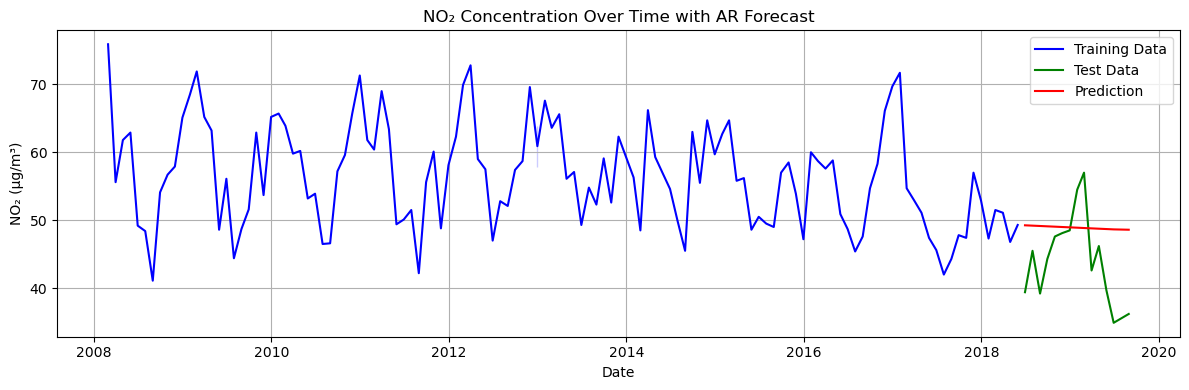

In [386]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Ensure predictions are on the right scale ---
# If predictions are DIFFS, invert them first
# last_train_value = train["NO2_ug_m3"].iloc[-1]
# predictions = predictions.cumsum() + last_train_value

# 1) Convert PeriodIndex -> Timestamp (month-end here; use .to_timestamp('MS') for month-start)
train_plot = train.copy()
test_plot  = test.copy()
train_plot = train_plot.copy()
test_plot  = test_plot.copy()

train_plot.index = train_plot.index.to_timestamp('M')
test_plot.index  = test_plot.index.to_timestamp('M')

# 2) Build tidy frames with a Date column (what seaborn likes)
train_plot = train_plot.rename_axis("Date").reset_index()
test_plot  = test_plot.rename_axis("Date").reset_index()

# 3) Ensure predictions is a numeric Series aligned to test (same order/length)
pred = pd.Series(predictions, index=test.index)   # align to PeriodIndex
pred.index = pred.index.to_timestamp('M')         # convert to Timestamp
pred_plot = pd.DataFrame({"Date": pred.index, "Prediction": pd.to_numeric(pred, errors="coerce")})

# 4) Plot
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=train_plot, x="Date", y="NO2_ug_m3", color="blue",  label="Training Data", ax=ax)
sns.lineplot(data=test_plot,  x="Date", y="NO2_ug_m3", color="green", label="Test Data",   ax=ax)
sns.lineplot(data=pred_plot,  x="Date", y="Prediction", color="red",  label="Prediction",  ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("NO₂ (µg/m³)")
ax.set_title("NO₂ Concentration Over Time with AR Forecast")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [387]:
test: pd.DataFrame
predictions: pd.Series

mae: float = mean_absolute_error(test["NO2_ug_m3"],
                                 predictions)

rmse: float = root_mean_squared_error(test["NO2_ug_m3"],
                                      predictions)

mape: float = mean_absolute_percentage_error(test["NO2_ug_m3"],
                                             predictions)

print(f"""Evaluation Metrics for AR(1):
  Mean Absolute Error (MAE): {mae:.2f}
  Root Mean Squared Error (RMSE): {rmse:.2f}
  Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%""")

Evaluation Metrics for AR(1):
  Mean Absolute Error (MAE): 6.34
  Root Mean Squared Error (RMSE): 7.57
  Mean Absolute Percentage Error (MAPE): 15.44%
